In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("WELFake_Dataset.csv")

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

# Text Preprocessing 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
vectorizer = TfidfVectorizer(max_features = 10000)
x = vectorizer.fit_transform(data["text"])

# Splitting Data into Training and Testing Sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, data["label"], test_size = 0.2, random_state = 42)

In [11]:
X_train.shape

(57229, 10000)

In [12]:
X_test.shape

(14308, 10000)

In [13]:
y_train.shape

(57229,)

In [14]:
y_test.shape

(14308,)

# Training Model 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

LogisticRegression accuracy is: 0.9449259155717081


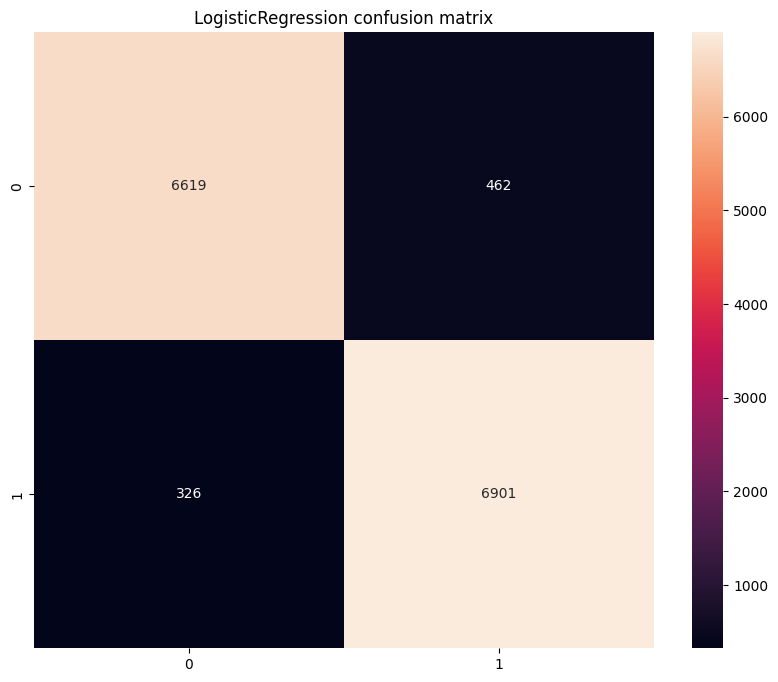

RandomForest accuracy is: 0.9392647469946883


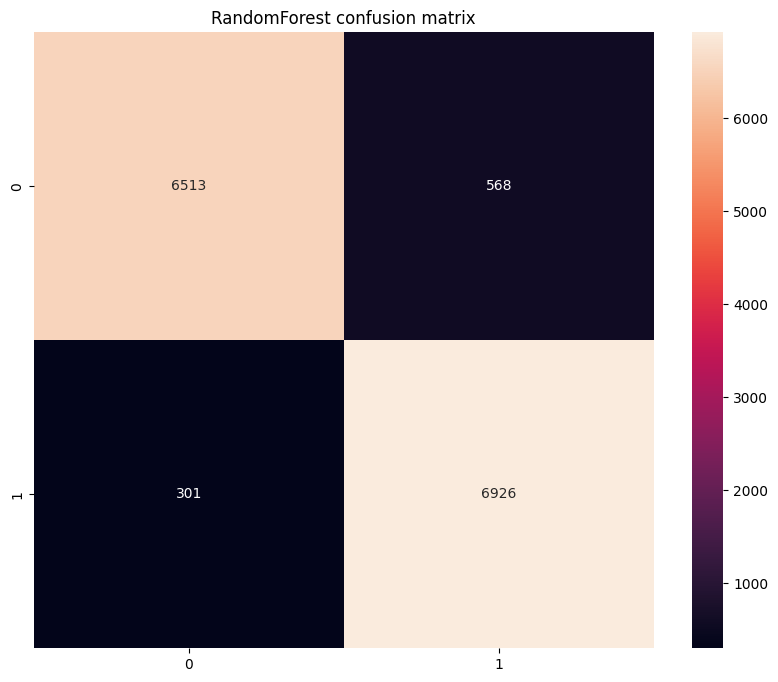

DecisionTree accuracy is: 0.9219317864131954


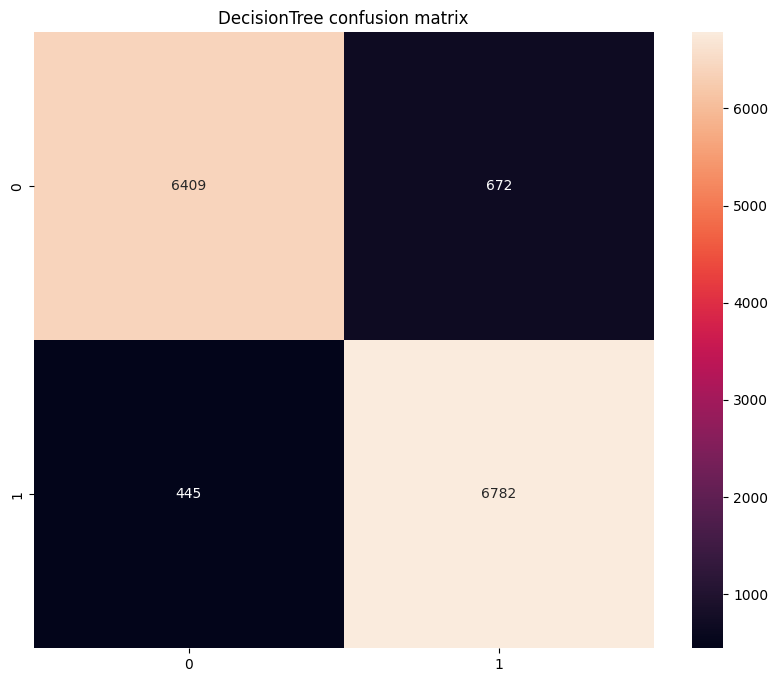

In [16]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "RandomForest" : RandomForestClassifier(n_estimators = 100, criterion = "gini", random_state = 42),
    "DecisionTree" : DecisionTreeClassifier(criterion = "entropy", random_state = 42)
}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # test model
    predictions = model.predict(X_test)

    # Accuracy 
    accuracy = accuracy_score(y_test, predictions)

    # Confusion matrix
    conf_metrix = confusion_matrix(y_test, predictions)

    print(f"{model_name} accuracy is: {accuracy}")

    # confusion matrix with heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(conf_metrix, annot = True, fmt = "d", color = "blue")
    plt.title(f"{model_name} confusion matrix")
    plt.show()
    


In [17]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

# Evaluation 

In [18]:
print("Training Accuracy is: ", lg_model.score(X_train, y_train))
print("Testing Accuracy is: ", lg_model.score(X_test, y_test))


Training Accuracy is:  0.9558790123888239
Testing Accuracy is:  0.9449259155717081


# Prediction 

In [19]:
predictions = lg_model.predict(X_test)

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7081
           1       0.94      0.95      0.95      7227

    accuracy                           0.94     14308
   macro avg       0.95      0.94      0.94     14308
weighted avg       0.95      0.94      0.94     14308



# Confusion Matrix

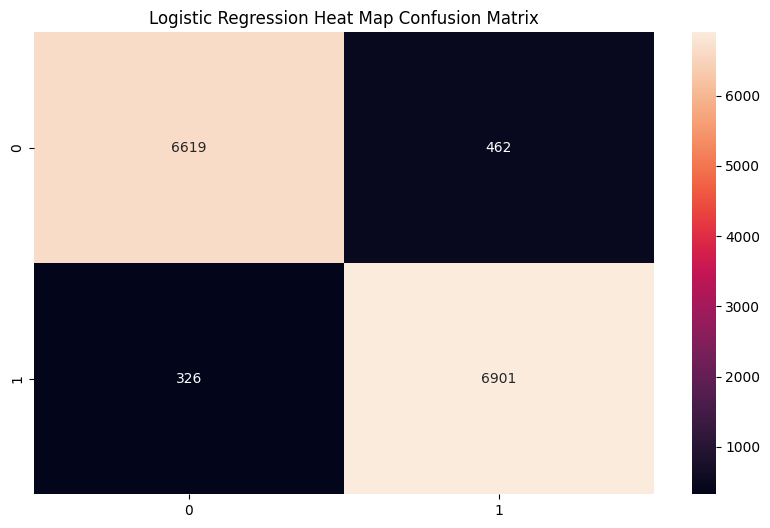

In [21]:
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize = (10,6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", color = "blue")
plt.title("Logistic Regression Heat Map Confusion Matrix")
plt.show()

# Function for Future Prediction 

In [22]:
def news_predicter(news):
    new_vectorizer = vectorizer.transform([news])
    predic = lg_model.predict(new_vectorizer)

    if predic[0] == 0:
        print("Fake")
    else:
        print("Real")
        
    return predic[0]

In [23]:
input = "On Tuesday, White House Propaganda Minister Sean Spicer once again baffled reporters and other thinking individuals by once again saying the dumbest thing imaginable.Asked why the White House refuses to provide documents related to former National Security Advisor and registered foreign agent Michael Flynn s hiring, Spicer took the tried-and-true route of blaming President Obama.Spicer explained that the Trump White House isn t responsible for anything related to Flynn s hiring because the documents were filled out   during the Obama administration  and  those are not documents that the White House would ever possess. Everything that the White House has been asked to do, the only documents that were made available to [Congress] that they asked for were the ones that the Department of Defense had,  Spicer said, explaining that he doesn t feel that the White House has an obligation to provide the information Congress has requested. How about these calls made where [Flynn] was working during the transition on behalf of a future President Trump?  CBS s Major Garrett asked.  Aren t those things that you should have some responsibility or obligation to provide if you can? It s a question [of] if you can,  Spicer said.  To ask for every call a national security adviser made is pretty outlandish. Those calls were made on behalf of the Trump transition were they not?  Garrett asked. Spicer, of course, told him that Trump isn t responsible for anything that happened before January 20 even if it was done by a member of the Trump transition team. When?  Spicer asked.  We started this administration on Jan. 20. All the information that they re talking about occurred prior to him being at the White House. Working for the transition!  Garrett pressed. Not at the White House!  Spicer snapped.  Everything that is being questioned occurred prior to Jan. 20th. Trump and his White House are absolutely responsible for Flynn   which is not good, as even Hillary Clinton witch hunter, Congressman Jason Chaffetz, admits that Flynn likely committed crimes.Watch this all happen below:Featured image via screengrab"

output = news_predicter(input)

Real


In [24]:
input = "NEW YORK (Reuters) - A second federal judge has taken the rare step of allowing a group suing for records from Hillary Clintonâ€™s time as U.S. secretary of state to seek sworn testimony from officials, saying there was â€œevidence of government wrong-doing and bad faith.â€ The language in Judge Royce Lamberthâ€™s order undercut the Democratic presidential contenderâ€™s assertion she was allowed to set up a private email server in her home for her work as the countryâ€™s top diplomat and that the arrangement was not particularly unusual. He described Clintonâ€™s email arrangement as â€œextraordinaryâ€ in his order filed on Tuesday in federal district court in Washington. Referring to the State Department, Clinton and Clintonâ€™s aides, he said there had been â€œconstantly shifting admissions by the Government and the former government officials.â€ Spokesmen for Clinton did not immediately respond to a request for comment.  The case is a civil matter, but the order adds to the legal uncertainty that has overshadowed Clintonâ€™s campaign to be the Democratic nominee in the Nov. 8 presidential election. The FBI is also conducting a criminal inquiry into the arrangement after it emerged that classified government secrets ended up in Clintonâ€™s unsecured email account. Clinton has said she does not think she will be charged with a crime.  Lamberthâ€™s order granted the request by Judicial Watch, a conservative watchdog group suing the department under open records laws, to gather evidence, including sworn testimony. The group has filed several lawsuits, including one seeking records about the 2012 attack in Benghazi, Libya, that killed U.S. Ambassador Christopher Stevens and three other Americans. â€œWhere there is evidence of government wrong-doing and bad faith, as here, limited discovery is appropriate, even though it is exceedingly rare in FOIA (freedom-of-information) cases,â€ Lamberth noted in his order. The government is normally given the benefit of the doubt that it properly searched and produced records.  Since the email arrangement came to public knowledge a year ago, the State Department has found itself defending Clinton in scores of lawsuits from groups, individuals and news outlets who say they were wrongly denied access to Clintonâ€™s federal records. Clinton left the department in 2013, but did not return her email records to the government until nearly two years later.  Last month, Judge Emmet Sullivan, who is overseeing a separate Judicial Watch lawsuit over other Clinton-related records, allowed a similar motion for discovery. (Story refiles to fix date of presidential election, paragraph 6.) "
output = news_predicter(input)

Fake


In [27]:
import joblib
joblib.dump(lg_model, "news_model.joblib")
joblib.dump(vectorizer, "vectorizer.joblib")

['vectorizer.joblib']